<a href="https://colab.research.google.com/github/carlamaziero/Reconhecimento_padroes/blob/main/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from platform import python_version

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00000/carbs341.txt')

In [4]:
import pandas as pd

url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/00000/carbs341.txt')
df = pd.read_csv(url)

X, y = df.iloc[:, :3], df.iloc[:, -1]

In [5]:
dataset.shape

(777, 1)

In [6]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X, y)
ypred =  modelo.predict(X)
intercept_ypred = modelo.intercept_
coef_ypred = modelo.coef_
print("Valor do Intercept: ", intercept_ypred)
print("Valor dos coeficientes da Regressão Linear: ", coef_ypred)

Valor do Intercept:  -8.526512829121202e-14
Valor dos coeficientes da Regressão Linear:  [1.]


In [7]:
from sklearn.metrics import mean_squared_error

mse_ypred = mean_squared_error(y, ypred)
print("Valor MSE: ", mse_ypred)

Valor MSE:  7.65493565974465e-28


In [8]:
dataset.head()

,200
0,143
1,181
2,150
3,164
4,100


In [9]:
dataset.describe()

,200
count,777.000000
mean,221.463320
std,49.813999
min,43.000000
25%,192.000000
50%,215.000000
75%,246.000000
max,738.000000


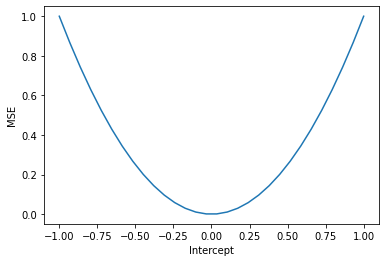

In [10]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1
iteracoes = 30
intercept_range = np.linspace(intercept_ypred - delta, intercept_ypred + delta , iteracoes)

mse = []

for i in range(iteracoes):
    modelo.intercept_ = intercept_range[i]
    ypred =  modelo.predict(X)
    mse.append(mean_squared_error(y, ypred))

plt.ylabel("MSE")
plt.xlabel("Intercept")
plt.plot(intercept_range, mse)
plt.show()